# UAP Explorer - Data Exploration

This notebook provides initial exploration of the UAP sighting dataset.

## Objectives
1. Load and inspect the raw dataset
2. Understand the data structure and quality
3. Identify key columns for analysis
4. Detect missing or invalid data
5. Perform basic statistical analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Dataset

Place your UAP/UFO dataset CSV file in the `data/raw/` directory.

Expected columns (adjust based on your dataset):
- Date/Time
- Location (city, state, country)
- Latitude/Longitude
- Shape
- Duration
- Description

In [2]:
# Load the dataset
data_path = Path('../data/raw/complete.csv')

# Check if file exists
if not data_path.exists():
    print(f"⚠️  Dataset not found at {data_path}")
    print("\nPlease:")
    print("1. Download a UAP/UFO sighting dataset (e.g., NUFORC)")
    print("2. Place it in the ml/data/raw/ directory")
    print("3. Update the filename in this cell")
else:
    # Load with error handling for malformed CSV lines
    df = pd.read_csv(data_path, on_bad_lines='skip', engine='python')
    print(f"✓ Dataset loaded successfully")
    print(f"  Rows: {len(df):,}")
    print(f"  Columns: {len(df.columns)}")
    print(f"\nColumn names:")
    print(df.columns.tolist())

✓ Dataset loaded successfully
  Rows: 88,679
  Columns: 11

Column names:
['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude']


## 2. Initial Inspection

In [3]:
# Display first few rows
df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


In [4]:
# Display column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [5]:
# Basic statistics for numeric columns
df.describe()

,longitude
count,88679.000000
mean,-85.021836
std,41.421744
min,-176.658056
25%,-112.073333
50%,-87.650000
75%,-77.769738
max,178.441900


## 3. Data Quality Analysis

In [6]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Missing Values by Column:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values by Column:
                      Missing Count  Percentage
country                       12365       13.94
state                          7409        8.35
duration (hours/min)           3019        3.40
shape                          2922        3.30
comments                         35        0.04
duration (seconds)                2        0.00


## 4. Key Field Analysis

Shape Distribution:
shape
light        17872
triangle      8489
circle        8453
fireball      6562
unknown       6319
other         6247
disk          6005
sphere        5755
oval          4119
formation     2657
cigar         2241
changing      2140
flash         1472
rectangle     1418
cylinder      1382
diamond       1308
chevron       1007
egg            845
teardrop       817
cone           367
cross          265
delta            8
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64


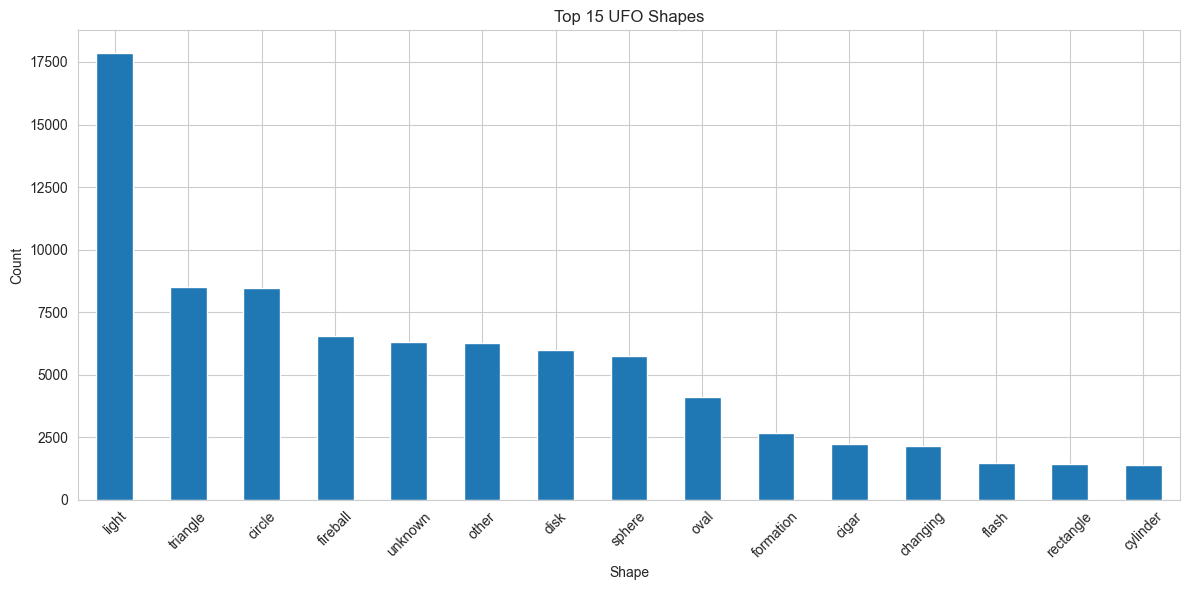

In [7]:
# Analyze shape field
if 'shape' in df.columns:
    print("Shape Distribution:")
    print(df['shape'].value_counts())
    
    plt.figure(figsize=(12, 6))
    df['shape'].value_counts().head(15).plot(kind='bar')
    plt.title('Top 15 UFO Shapes')
    plt.xlabel('Shape')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

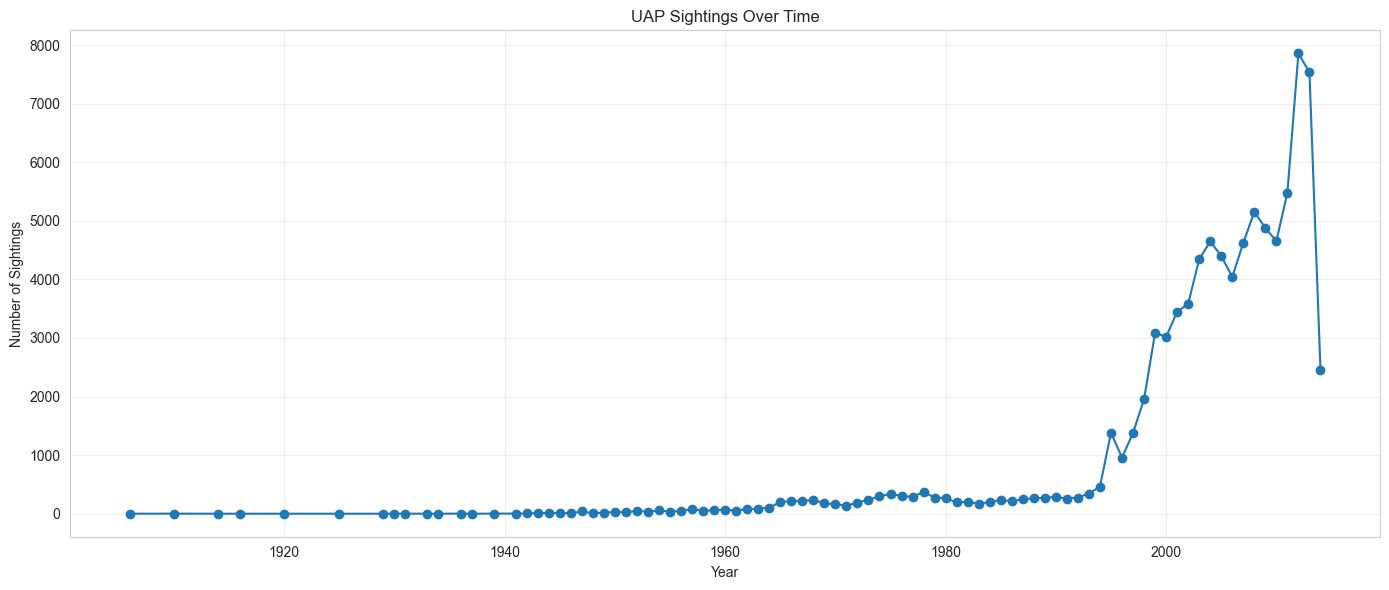

In [8]:
# Analyze temporal patterns
if 'datetime' in df.columns or 'date' in df.columns:
    date_col = 'datetime' if 'datetime' in df.columns else 'date'
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Extract year
    df['year'] = df[date_col].dt.year
    
    # Plot sightings over time
    plt.figure(figsize=(14, 6))
    yearly_counts = df.groupby('year').size()
    yearly_counts.plot(kind='line', marker='o')
    plt.title('UAP Sightings Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Sightings')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 5. Geographic Distribution

Records with valid coordinates: 88,679 (100.0%)


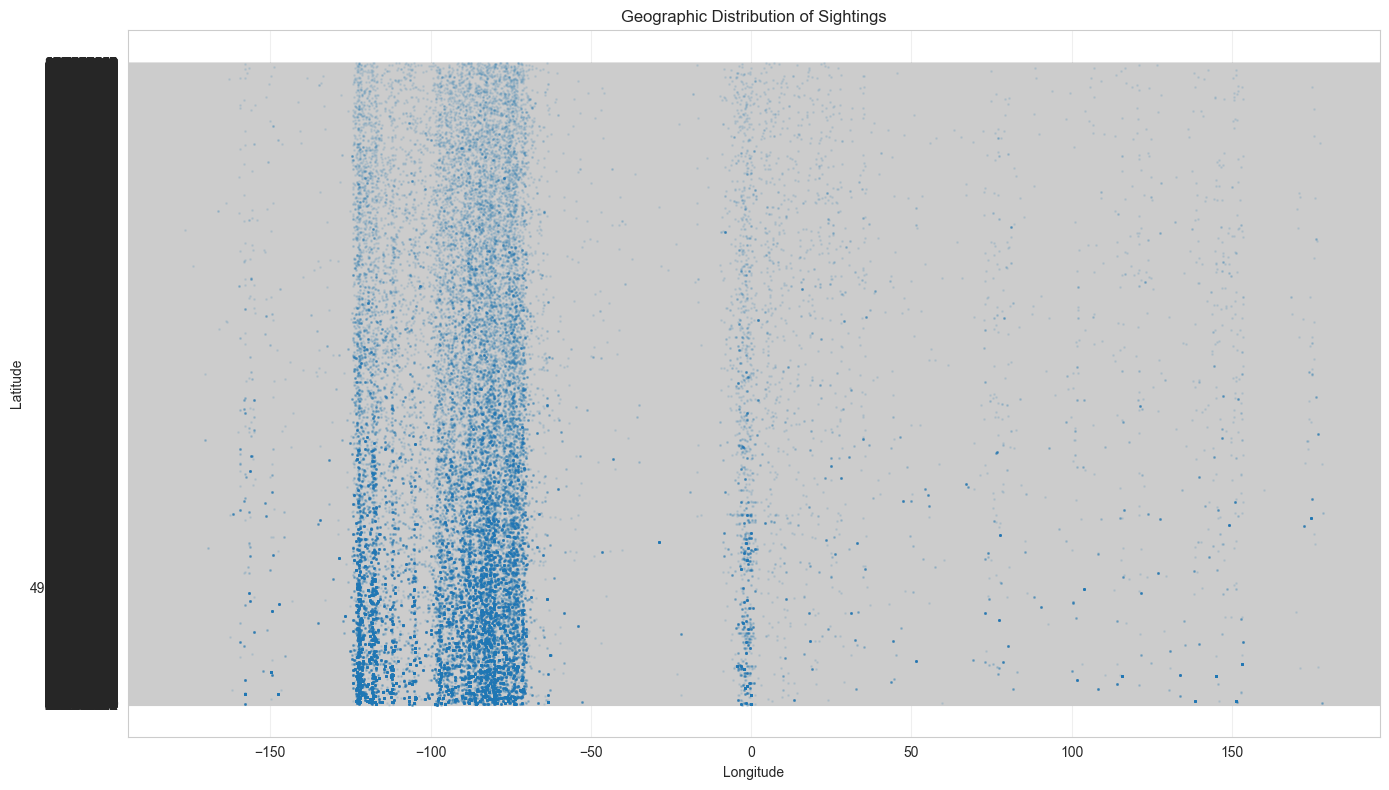

In [9]:
# Analyze geographic distribution
if 'latitude' in df.columns and 'longitude' in df.columns:
    valid_coords = df[df['latitude'].notna() & df['longitude'].notna()]
    
    print(f"Records with valid coordinates: {len(valid_coords):,} ({len(valid_coords)/len(df)*100:.1f}%)")
    
    # Simple scatter plot of coordinates
    plt.figure(figsize=(14, 8))
    plt.scatter(valid_coords['longitude'], valid_coords['latitude'], alpha=0.1, s=1)
    plt.title('Geographic Distribution of Sightings')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 6. Text Analysis Preview

In [10]:
# Look at sample descriptions
if 'description' in df.columns or 'comments' in df.columns:
    text_col = 'description' if 'description' in df.columns else 'comments'
    
    # Show length distribution
    df['text_length'] = df[text_col].astype(str).str.len()
    
    print("\nText Length Statistics:")
    print(df['text_length'].describe())
    
    # Sample a few descriptions
    print("\n=== Sample Descriptions ===")
    for idx, row in df.sample(3).iterrows():
        print(f"\n[Sample {idx}]")
        print(row[text_col][:300] + "..." if len(str(row[text_col])) > 300 else row[text_col])


Text Length Statistics:
count    88679.000000
mean        83.148851
std         39.348099
min          1.000000
25%         50.000000
50%         79.000000
75%        121.000000
max        246.000000
Name: text_length, dtype: float64

=== Sample Descriptions ===

[Sample 40503]
Man&#44 3 neighbors witness &quot;huge&quot; cluster of amber lights pass slowly from SW to NE. Sky crystal clear. Steady pace&#44 no noise.

[Sample 881]
This all started earier in the day&#44 as I fired some small arms&#44 I noticed a sound of thunder then a sonic boom then the sounds of a jet

[Sample 77026]
Two orange lights fly at eachother and become one.


## 7. Summary & Next Steps

Based on this exploration, document your findings:

### Key Observations
- Total records:
- Date range:
- Geographic coverage:
- Data quality issues:

### Next Steps
1. Create `clean_data.py` script to normalize and clean the data
2. Handle missing values (drop or impute)
3. Standardize date/time formats
4. Validate coordinates
5. Clean and normalize text fields